In [1]:
#importing all the required libraries
import mysql.connector

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
#making connection between jupiter notbook and studb database in mysql server
con=mysql.connector.connect(
    host='localhost',
    port=3306,
    user='root',
    password='kunwar12',
    database='studb')

In [3]:
# importing data from student_mark using sql query 
sm=pd.read_sql_query('Select * from student_marks',con,parse_dates=['dteday'])
sm

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


In [4]:
# checking shape
sm.shape

(10, 11)

In [5]:
# checking data type of all columns
sm.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [6]:
# checking null value
sm.isnull().sum()

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

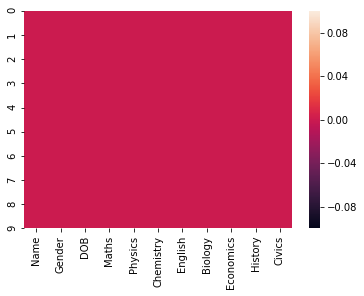

In [7]:
# heatmap of null value
sns.heatmap(sm.isnull())

In [8]:
# adding total marks and percentage obtained column
sm['Total'] = sm[['Maths','Physics','Chemistry','English','Biology','Economics','History','Civics']].sum(axis=1)
sm['Percentage'] = (sm['Total']*100)/800
sm

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
0,John,M,05-04-1988,55,45,56,87,21,52,89,65,470,58.750
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2,524,65.500
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74,556,69.500
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45,586,73.250
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53,587,73.375
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52,556,69.500
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61,496,62.000
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87,517,64.625
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89,587,73.375
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77,566,70.750


In [9]:
# checking the data description
sm.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.00000,10.000000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000,544.50000,68.062500
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432,41.01558,5.126947
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000,470.00000,58.750000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500,518.75000,64.843750
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000,556.00000,69.500000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500,581.00000,72.625000
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000,587.00000,73.375000


In [10]:
# corelation between coloums
sm.corr()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629,0.156049,0.156049
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266,0.372033,0.372033
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908,0.545944,0.545944
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705,-0.132607,-0.132607
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060,0.489008,0.489008
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905,0.830433,0.830433
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686,-0.199145,-0.199145
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000,0.082574,0.082574
Total,0.156049,0.372033,0.545944,-0.132607,0.489008,0.830433,-0.199145,0.082574,1.000000,1.000000
Percentage,0.156049,0.372033,0.545944,-0.132607,0.489008,0.830433,-0.199145,0.082574,1.000000,1.000000


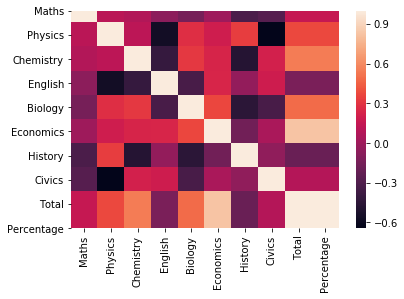

In [11]:
# heat map of corelation
sns.heatmap(sm.corr())

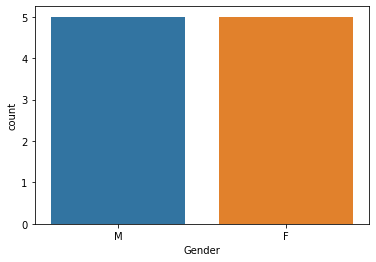

In [12]:
#comparing the number of manle and female
sns.countplot(x=sm['Gender'],data=sm)

Maths             AxesSubplot(0.125,0.71587;0.227941x0.16413)
Physics        AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Chemistry      AxesSubplot(0.672059,0.71587;0.227941x0.16413)
English          AxesSubplot(0.125,0.518913;0.227941x0.16413)
Biology       AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Economics     AxesSubplot(0.672059,0.518913;0.227941x0.16413)
History          AxesSubplot(0.125,0.321957;0.227941x0.16413)
Civics        AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Total         AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Percentage          AxesSubplot(0.125,0.125;0.227941x0.16413)
dtype: object

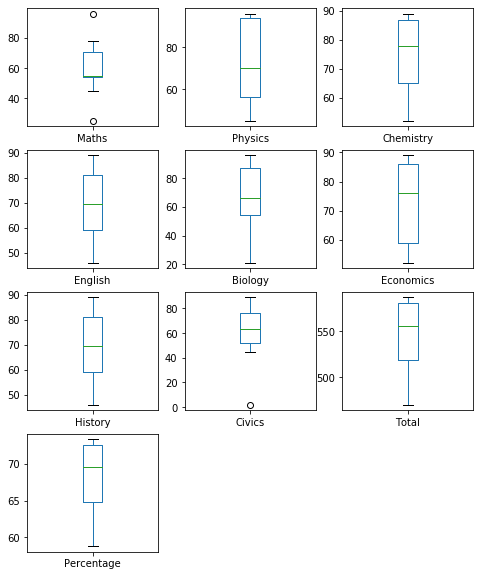

In [13]:
# using box plot to visualize the minmum, maximum, avarage and outlires
sm.plot(kind='box',subplots=True,layout=(4,3),figsize=(8,10))

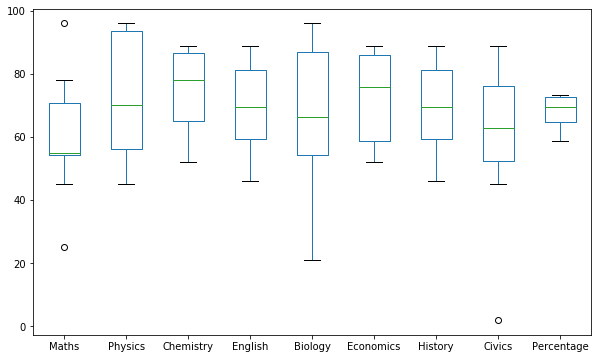

In [14]:
#comparing marks of each subject using box plot
smp=sm.drop(['Total'],axis=1)
smp.plot(kind='box',figsize=(10,6))

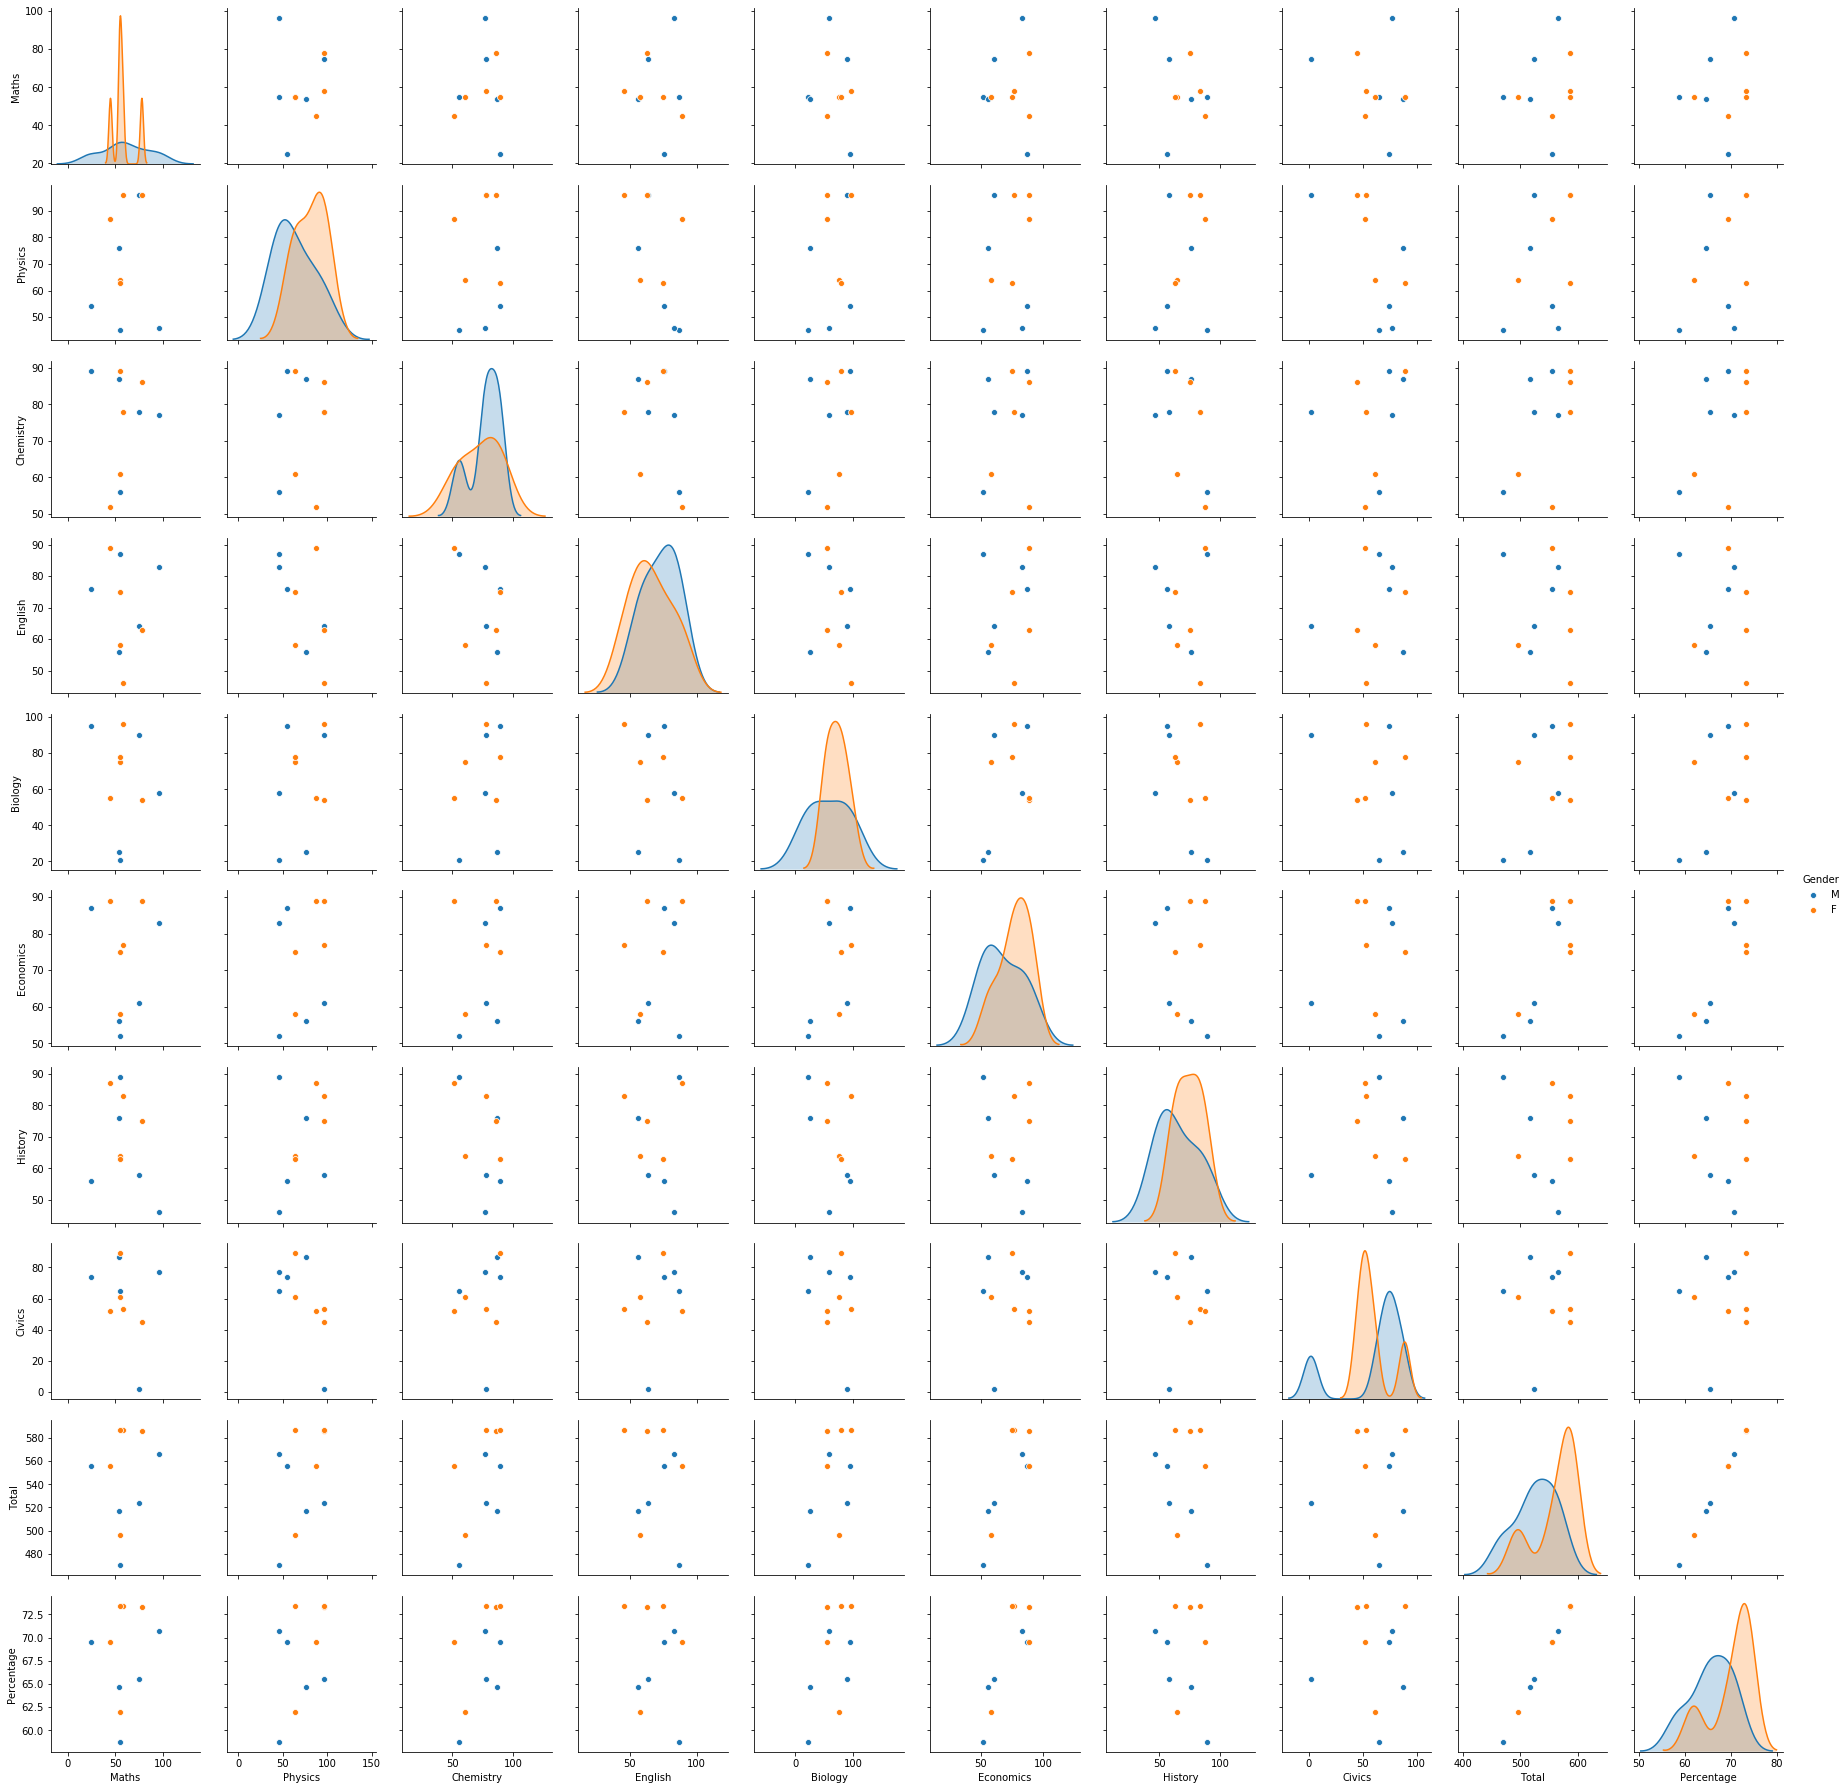

In [15]:
# pair plot to see the scatter of data using gender as hue for clear understanding
sns.pairplot(sm, hue='Gender')

In [16]:
#droping the name and DOB coloum
sm1=sm
sm1=sm1.drop(['Name','DOB'], axis=1)

In [17]:
# using Label Encoding for converting the gender labels into numeric form
le=LabelEncoder()
sm1['Gender']=le.fit_transform(sm1['Gender'])
sm1.head()

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
0,1,55,45,56,87,21,52,89,65,470,58.750
1,1,75,96,78,64,90,61,58,2,524,65.500
2,1,25,54,89,76,95,87,56,74,556,69.500
3,0,78,96,86,63,54,89,75,45,586,73.250
4,0,58,96,78,46,96,77,83,53,587,73.375


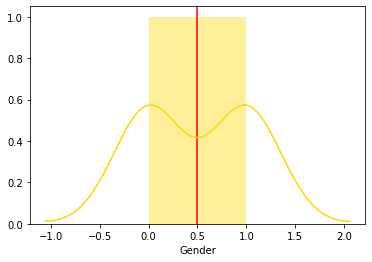

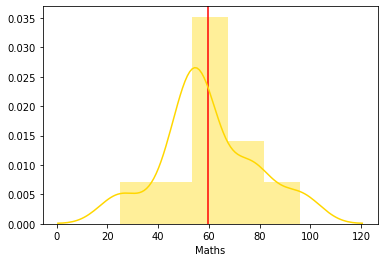

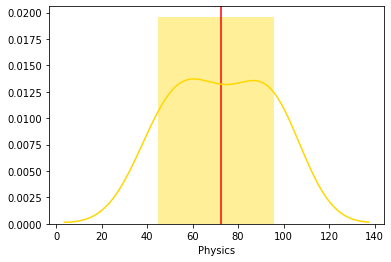

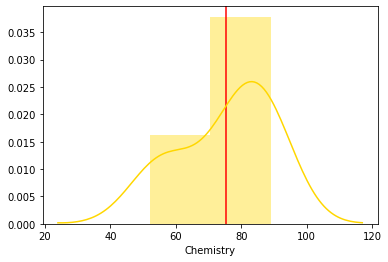

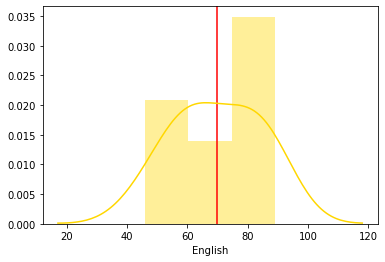

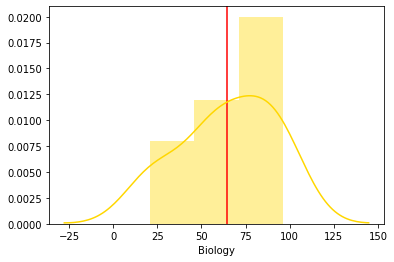

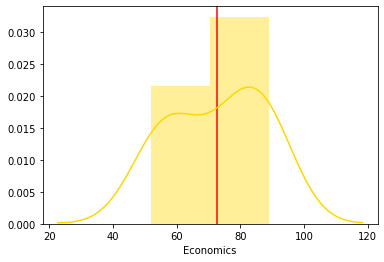

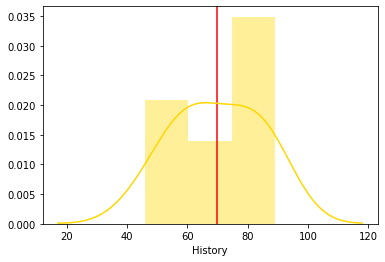

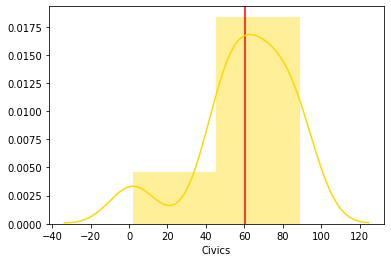

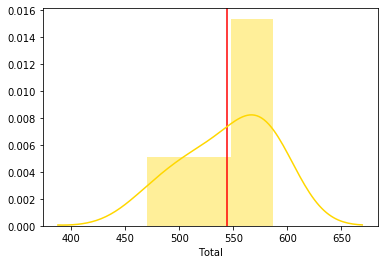

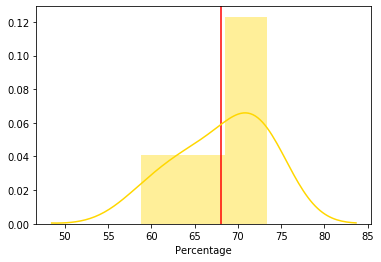

In [18]:
# Histogram - Distribution plot for all variables
for i,col in enumerate(sm1):
    plt.figure(i)
    plt.axvline(sm1[col].mean(),color = 'r')
    sns.distplot(sm1[col],color='gold')

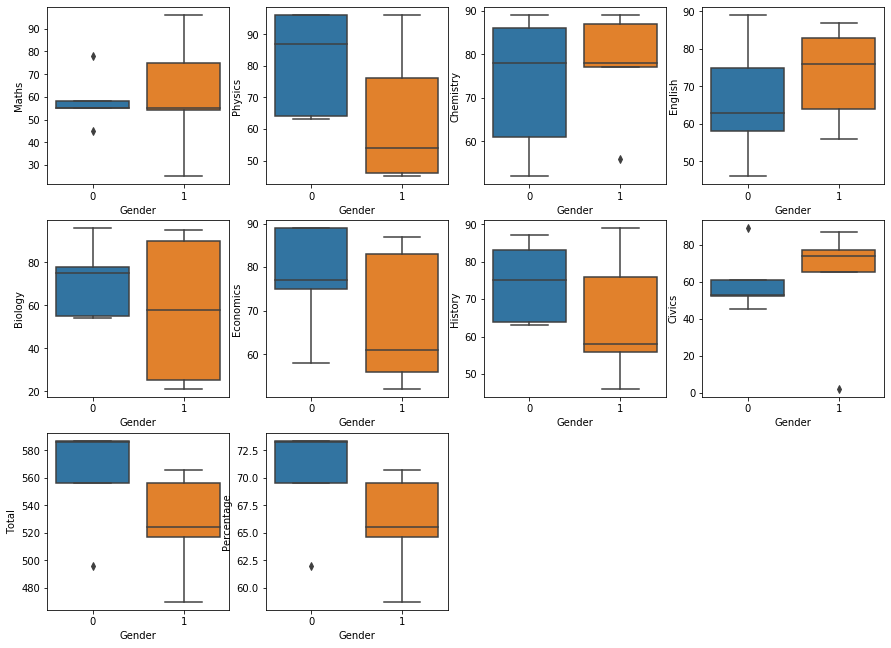

In [19]:
#creating box plot for each subject with respect to gender
figure(num=None, figsize=(15,15))
for column_index, column in enumerate(sm1.columns):
    if column == 'Gender':
        continue
    plt.subplot(4, 4, column_index)
    sns.boxplot(x='Gender', y=column, data=sm1)

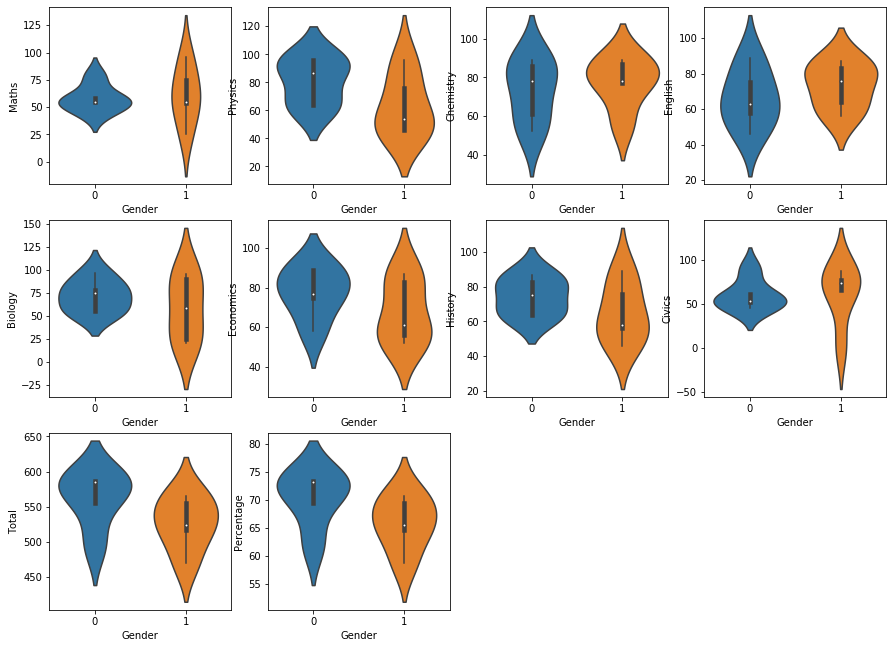

In [20]:
#creating violin plot for each subject with respect to gender
figure(num=None, figsize=(15,15))
for column_index, column in enumerate(sm1.columns):
    if column == 'Gender':
        continue
    plt.subplot(4, 4, column_index)
    sns.violinplot(x='Gender', y=column, data=sm1)

In [21]:
#Top 3 student of class
print('Top 3 student of class:')
sm.nlargest(3, ['Total'])

Top 3 student of class:


,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53,587,73.375
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89,587,73.375
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45,586,73.250


In [22]:
#Bottom 3 student of class
print('Bottom 3 student of class:')
sm.nsmallest(3, ['Total'])

Bottom 3 student of class:


,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Percentage
0,John,M,05-04-1988,55,45,56,87,21,52,89,65,470,58.750
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61,496,62.000
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87,517,64.625


In [23]:
subjects=sm.drop(['Name','DOB','Gender','Total','Percentage'], axis=1)

In [24]:
print('Maximum marks in each subject:\n',subjects.max())

Maximum marks in each subject:
 Maths        96
Physics      96
Chemistry    89
English      89
Biology      96
Economics    89
History      89
Civics       89
dtype: int64


In [25]:
print('Minimum marks in each subject:\n',subjects.min())

Minimum marks in each subject:
 Maths        25
Physics      45
Chemistry    52
English      46
Biology      21
Economics    52
History      46
Civics        2
dtype: int64


In [26]:
# Minimum number obtained by student with name
for i in subjects:
    print ('In',i,'the least scorer is: \n',sm['Name'][sm[i]==sm[i].min()])
    print('Marks obtained : ' ,sm[i].min(),'\n\n')

In Maths the least scorer is: 
 2    Ramesh
Name: Name, dtype: object
Marks obtained :  25 


In Physics the least scorer is: 
 0    John
Name: Name, dtype: object
Marks obtained :  45 


In Chemistry the least scorer is: 
 5    Annu
Name: Name, dtype: object
Marks obtained :  52 


In English the least scorer is: 
 4    Jennifer
Name: Name, dtype: object
Marks obtained :  46 


In Biology the least scorer is: 
 0    John
Name: Name, dtype: object
Marks obtained :  21 


In Economics the least scorer is: 
 0    John
Name: Name, dtype: object
Marks obtained :  52 


In History the least scorer is: 
 9    Mukesh
Name: Name, dtype: object
Marks obtained :  46 


In Civics the least scorer is: 
 1    Suresh
Name: Name, dtype: object
Marks obtained :  2 




In [27]:
# Maximum number obtained by student with name
for i in subjects:
    print ('In',i,'the maximum scorer is: \n',sm['Name'][sm[i]==sm[i].max()])
    print('Marks obtained : ' ,sm[i].max(),'\n\n')# Minimum number obtained by student with name

In Maths the maximum scorer is: 
 9    Mukesh
Name: Name, dtype: object
Marks obtained :  96 


In Physics the maximum scorer is: 
 1      Suresh
3     Jessica
4    Jennifer
Name: Name, dtype: object
Marks obtained :  96 


In Chemistry the maximum scorer is: 
 2    Ramesh
8     Farha
Name: Name, dtype: object
Marks obtained :  89 


In English the maximum scorer is: 
 5    Annu
Name: Name, dtype: object
Marks obtained :  89 


In Biology the maximum scorer is: 
 4    Jennifer
Name: Name, dtype: object
Marks obtained :  96 


In Economics the maximum scorer is: 
 3    Jessica
5       Annu
Name: Name, dtype: object
Marks obtained :  89 


In History the maximum scorer is: 
 0    John
Name: Name, dtype: object
Marks obtained :  89 


In Civics the maximum scorer is: 
 8    Farha
Name: Name, dtype: object
Marks obtained :  89 




In [28]:
#checking skewness
sm.skew()

Maths         0.246964
Physics      -0.045336
Chemistry    -0.746462
English      -0.131222
Biology      -0.496446
Economics    -0.245555
History      -0.131222
Civics       -1.332448
Total        -0.642123
Percentage   -0.642123
dtype: float64